In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
country_df = pd.read_csv('countryData.csv')
country_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,8.16,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,8.18,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,8.13,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,8.52,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.87,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
immune_df = pd.read_csv('immunitizationData.csv')
immune_df.head()

,Country,Year,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,Afghanistan,2015,62,65.0,1154,19.1,83,6.0,65.0,0.1
1,Afghanistan,2014,64,62.0,492,18.6,86,58.0,62.0,0.1
2,Afghanistan,2013,66,64.0,430,18.1,89,62.0,64.0,0.1
3,Afghanistan,2012,69,67.0,2787,17.6,93,67.0,67.0,0.1
4,Afghanistan,2011,71,68.0,3013,17.2,97,68.0,68.0,0.1


In [4]:
print(country_df.shape)
print(immune_df.shape)

(2938, 13)
(2938, 10)


In [5]:
print(country_df.isna().sum())
print(immune_df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Total expenditure                  226
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                 0
Year                    0
infant deaths           0
Hepatitis B           553
Measles                 0
 BMI                   34
under-five deaths       0
Polio                  19
Diphtheria             19
 HIV/AIDS               0
dtype: int64


In [6]:
print(country_df.duplicated().sum())
print(immune_df.duplicated().sum())

0
0


In [7]:
print(country_df.describe(include='all'))
# print(immune_df.describe())

                         Country         Year      Status  Life expectancy   \
count                       2938  2938.000000        2938       2928.000000   
unique                       193          NaN           2               NaN   
top     Central African Republic          NaN  Developing               NaN   
freq                          16          NaN        2426               NaN   
mean                         NaN  2007.518720         NaN         69.224932   
std                          NaN     4.613841         NaN          9.523867   
min                          NaN  2000.000000         NaN         36.300000   
25%                          NaN  2004.000000         NaN         63.100000   
50%                          NaN  2008.000000         NaN         72.100000   
75%                          NaN  2012.000000         NaN         75.700000   
max                          NaN  2015.000000         NaN         89.000000   

        Adult Mortality      Alcohol  Total expendi

In [8]:
 print(immune_df.describe(include='all'))

                         Country         Year  infant deaths  Hepatitis B  \
count                       2938  2938.000000    2938.000000  2385.000000   
unique                       193          NaN            NaN          NaN   
top     Central African Republic          NaN            NaN          NaN   
freq                          16          NaN            NaN          NaN   
mean                         NaN  2007.518720      30.303948    80.940461   
std                          NaN     4.613841     117.926501    25.070016   
min                          NaN  2000.000000       0.000000     1.000000   
25%                          NaN  2004.000000       0.000000    77.000000   
50%                          NaN  2008.000000       3.000000    92.000000   
75%                          NaN  2012.000000      22.000000    97.000000   
max                          NaN  2015.000000    1800.000000    99.000000   

             Measles          BMI   under-five deaths         Polio  \
coun

In [9]:
# Few columns are preceding with the spaces
print(country_df.dtypes)

print("\n")

print(immune_df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
Alcohol                            float64
Total expenditure                  float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


Country                object
Year                    int64
infant deaths           int64
Hepatitis B           float64
Measles                 int64
 BMI                  float64
under-five deaths       int64
Polio                 float64
Diphtheria            float64
 HIV/AIDS             float64
dtype: object


In [10]:
## Rename the column by removing blank spaces from both the dataset. 
## Apply string strip with rename function on each dataset columns
country_df.rename(columns=lambda x: x.strip(), inplace=True)
immune_df.rename(columns=lambda x: x.strip(), inplace=True)

In [11]:
print(country_df.columns)
print(immune_df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Total expenditure', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'infant deaths', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS'],
      dtype='object')


In [12]:
# Create a primary key column for both dataframes, named as “UniqueKey”, using apply method on columns “Country” and “Year”
country_df["UniqueKey"] = country_df.apply(lambda x : x['Country'] + str(x['Year']), axis=1)
immune_df["UniqueKey"] = immune_df.apply(lambda x : x['Country'] + str(x['Year']), axis=1)

In [13]:
# Both the datasets have columns "Country" and "Year" as common, so we can drop columns "Country" and "Year" from any dataframe, 
# or else, after merging you will find two columns each related to "Country" and "Year".
immune_df.drop(["Country", 'Year'], axis = 1, inplace = True)

In [14]:
# Merge operations on the datasets countryData and immunitizationData, using the common column “UniqueKey”, 
# to form as single dataset and name it as df.
df = pd.merge(country_df, immune_df, on = 'UniqueKey', how = 'inner')

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Total expenditure', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'UniqueKey',
       'infant deaths', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Diphtheria', 'HIV/AIDS'],
      dtype='object')

In [16]:
print(df.shape)

(2938, 22)


In [17]:
#### Missing value columns- "Life expectancy", "Adult Mortality", "Alcohol", "Total expenditure", "GDP", "Population", "Polio",
#### "thinness  1-19 years", "thinness 5-9 years", "Income composition of resources", "Schooling", "Hepatitis B", "BMI", "Diphtheria"
for v in ["Life expectancy", "Adult Mortality", "Alcohol", "Total expenditure", "GDP", "Population", "thinness  1-19 years",\
          "thinness 5-9 years", "Income composition of resources", "Schooling", "Hepatitis B", "BMI", "Polio", "Diphtheria"]:
    df[v].fillna(df[v].median(), inplace=True)

In [18]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Total expenditure                  0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
UniqueKey                          0
infant deaths                      0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
dtype: int64

In [19]:
df.describe()

,Year,Life expectancy,Adult Mortality,Alcohol,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,4.546875,5.924098,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837,30.303948,83.022124,2419.592240,38.381178,42.035739,82.617767,82.393125,1.742103
std,4.613841,9.509115,124.086215,3.921946,2.400770,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139,117.926501,22.996984,11467.272489,19.935375,160.445548,23.367166,23.655562,5.077785
min,2000.000000,36.300000,1.000000,0.010000,0.370000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000
25%,2004.000000,63.200000,74.000000,1.092500,4.370000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,82.000000,0.000000,19.400000,0.000000,78.000000,78.000000,0.100000
50%,2008.000000,72.100000,144.000000,3.755000,5.755000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,3.000000,92.000000,17.000000,43.500000,4.000000,93.000000,93.000000,0.100000
75%,2012.000000,75.600000,227.000000,7.390000,7.330000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,22.000000,96.000000,360.250000,56.100000,28.000000,97.000000,97.000000,0.800000
max,2015.000000,89.000000,723.000000,17.870000,17.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1800.000000,99.000000,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000


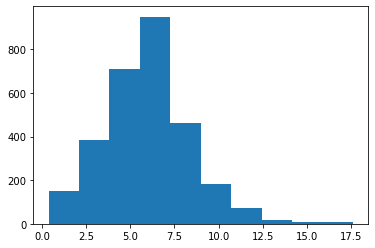

In [20]:
# Plot the distribution of government expenditure on health? From the plot enter the value of the bar which has the highest count.
y, x, _ = plt.hist(df['Total expenditure'])

In [21]:
y.max()

949.0

In [22]:
x.max()

17.6

(array([283., 361., 423., 214., 230., 399., 711., 282.,  30.,   5.]),
 array([ 1.  ,  9.63, 18.26, 26.89, 35.52, 44.15, 52.78, 61.41, 70.04,
        78.67, 87.3 ]),
 <BarContainer object of 10 artists>)

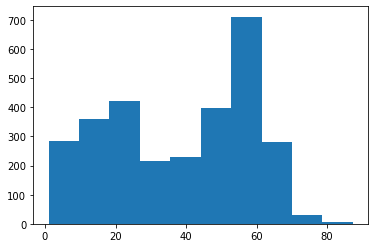

In [23]:
plt.hist(df['BMI'])

Task for the Presentation:

Plot the distribution of other columns like Life expectancy, Immunization coverage of the diseases, Economic condition, etc. Share your observation in the presentation.

 Immunization coverage of the diseases list = Diphtheria, Polio, Hepatitis B

In [24]:
# figure, axes = plt.subplot(2,3, figsize=(15,10))
# i=0
# df[['Life expectancy','Diphtheria', 'Polio', 'Hepatitis B', 'GDP' ]]
# for axrow in axes:
#     for ax in axrow:
#         sn.histplot(df[i], ax=ax)
#         i=i+1


(array([ 170.,    3.,   22.,   35.,   68.,   59.,  150.,  272.,  470.,
        1689.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

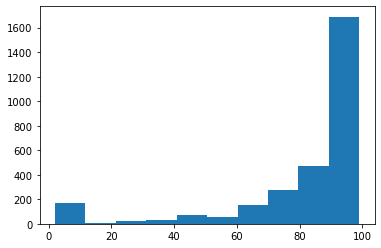

In [25]:
# plt.hist(df['Life expectancy'])
plt.hist(df['Diphtheria'])
# plt.hist(df['Polio'])
# plt.hist(df['Hepatitis B'])
# plt.hist(df['GDP'])


In [26]:
# Which variables are highly correlated(with minimum outliers)?
# thinness 1-19 years, thinness 5-9 years
# infant deaths, under-five deaths
# Total expenditure, GDP

<AxesSubplot:xlabel='thinness  1-19 years', ylabel='thinness 5-9 years'>

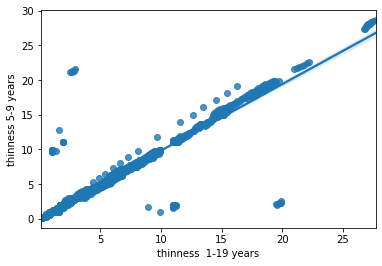

In [27]:
# sn.regplot( y ='thinness 1-19 years', x = 'thinness 5-9 years', data= df)
# sn.regplot(x='infant deaths', y='under-five deaths', data=df, ci=95)
# sn.regplot(x='Total expenditure', y='GDP', data=df, ci=95)
sn.regplot(x="thinness  1-19 years", y="thinness 5-9 years", data=df)

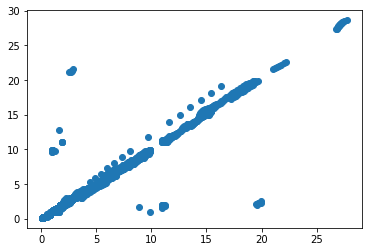

In [28]:
plt.scatter(x="thinness  1-19 years", y="thinness 5-9 years", data=df)

<AxesSubplot:xlabel='GDP', ylabel='Total expenditure'>

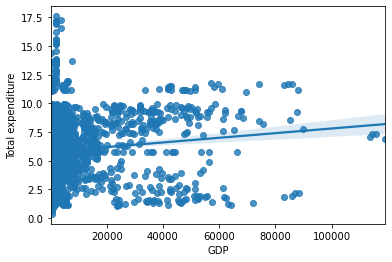

In [29]:
sn.regplot(x="GDP", y="Total expenditure", data=df, ci=90)

Take out 2015 for all the countries in the new data frame (use it for Q 4, 5, 6)

In [30]:
df_15 = df[df['Year']==2015]
df_15.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Total expenditure,GDP,Population,thinness 1-19 years,...,Schooling,UniqueKey,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,Afghanistan,2015,Developing,65.0,263.0,0.010,8.160,584.259210,33736494.0,17.2,...,10.1,Afghanistan2015,62,65.0,1154,19.1,83,6.0,65.0,0.1
16,Albania,2015,Developing,77.8,74.0,4.600,6.000,3954.227830,28873.0,1.2,...,14.2,Albania2015,0,99.0,0,58.0,0,99.0,99.0,0.1
32,Algeria,2015,Developing,75.6,19.0,3.755,5.755,4132.762920,39871528.0,6.0,...,14.4,Algeria2015,21,95.0,63,59.5,24,95.0,95.0,0.1
48,Angola,2015,Developing,52.4,335.0,3.755,5.755,3695.793748,2785935.0,8.3,...,11.4,Angola2015,66,64.0,118,23.3,98,7.0,64.0,1.9
64,Antigua and Barbuda,2015,Developing,76.4,13.0,3.755,5.755,13566.954100,1386542.0,3.3,...,13.9,Antigua and Barbuda2015,0,99.0,0,47.7,0,86.0,99.0,0.2


Text(0, 0.5, 'Life expectancy')

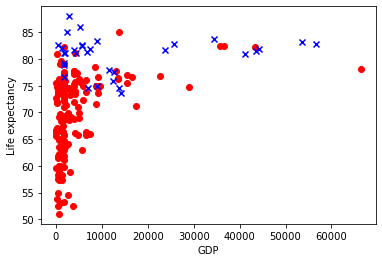

In [31]:
plt.scatter(x='GDP', y='Life expectancy', data=df_15[df_15['Status']=='Developing'], color='red')
plt.scatter(x='GDP', y='Life expectancy', data=df_15[df_15['Status']=='Developed'], color='blue', marker='x')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Income composition of resources: 0-1')

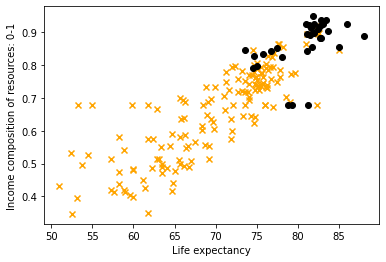

In [32]:
# Does the Productive use of resources make life expectancy better? Compare for developing and developed countries.
plt.scatter(x='Life expectancy', y='Income composition of resources', data=df_15[df_15['Status']=='Developing'], marker='x',color='orange')
plt.scatter(x='Life expectancy', y='Income composition of resources', data=df_15[df_15['Status']=='Developed'], marker='o',color='black')
plt.xlabel('Life expectancy')
plt.ylabel('Income composition of resources: 0-1')

## If a country utilizes its resources productively, it is more likely to see its citizens live longer than expected.

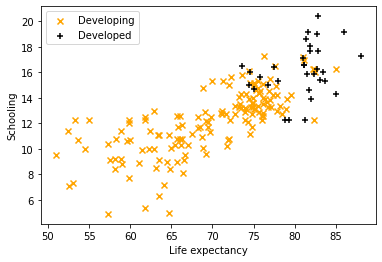

In [120]:
# Does Schooling impact life expectancy any better? Compare for developing and developed countries.
plt.scatter(x='Life expectancy', y='Schooling', data=df_15[df_15['Status']=='Developing'], marker='x',color='orange',label='Developing')
plt.scatter(x='Life expectancy', y='Schooling', data=df_15[df_15['Status']=='Developed'], marker='+',color='black', label='Developed')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()

## If schooling occur more, it improves life ecpectancy

Our target variable is Life expectancy so let’s start analyzing few important variables wrt it. 

Calculate the average life expectancy of all the years and find out Top and Bottom countries.

Rank countries based on their average life expectancy.

Compare a few country’s life expectancies.

Compare life expectancy of Developed vs Developing country.

In [34]:
# Which countries have a better life expectancy? Select the top 3.
df.groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index()


,Country,Life expectancy
0,Japan,82.53750
1,Sweden,82.51875
2,Iceland,82.44375
3,Switzerland,82.33125
4,France,82.21875
...,...,...
188,Malawi,49.89375
189,Angola,49.01875
190,Lesotho,48.78125
191,Central African Republic,48.51250


In [35]:
# Developing countries
df[df['Status']=='Developing'].groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index()
# plt.figure(figsize=(25,10))
# sn.barplot(x='Country', y='Life expectancy', data=df[df['Status']=='Developing'].groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index())
# plt.scatter(x='Country', y='Life expectancy', data=df[df['Status']=='Developing'].groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index())

,Country,Life expectancy
0,France,82.21875
1,Canada,81.68750
2,Israel,81.30000
3,Greece,81.21875
4,Finland,80.71250
...,...,...
156,Malawi,49.89375
157,Angola,49.01875
158,Lesotho,48.78125
159,Central African Republic,48.51250


In [36]:
# Developed country
df[df['Status']=='Developed'].groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index()


,Country,Life expectancy
0,Japan,82.53750
1,Sweden,82.51875
2,Iceland,82.44375
3,Switzerland,82.33125
4,Italy,82.18750
5,Spain,82.06875
6,Australia,81.81250
7,Norway,81.79375
8,Austria,81.48125
9,Singapore,81.47500


In [37]:
# Which countries have the worst life expectancy? Select the bottom 3.
df.groupby('Country').mean()['Life expectancy'].sort_values(ascending=True).reset_index()

,Country,Life expectancy
0,Sierra Leone,46.11250
1,Central African Republic,48.51250
2,Lesotho,48.78125
3,Angola,49.01875
4,Malawi,49.89375
...,...,...
188,France,82.21875
189,Switzerland,82.33125
190,Iceland,82.44375
191,Sweden,82.51875


In [38]:
life_expectancy_by_country = df.groupby('Country').mean()['Life expectancy'].sort_values(ascending=False).reset_index()

In [106]:
life_expectancy_by_country[life_expectancy_by_country['Country']==('India')]

,Country,Life expectancy
135,India,65.41875


In [98]:
# rank of country by life expectency
df.groupby('Country').mean()['Life expectancy'].rank(ascending=False).sort_values().head(50)

Country
Japan                                                    1.0
Sweden                                                   2.0
Iceland                                                  3.0
Switzerland                                              4.0
France                                                   5.0
Italy                                                    6.0
Spain                                                    7.0
Australia                                                8.0
Norway                                                   9.0
Canada                                                  10.0
Austria                                                 11.0
Singapore                                               12.0
New Zealand                                             13.0
Israel                                                  14.0
Greece                                                  15.0
Germany                                                 16.0
Netherlands     

In [41]:
# Compare average life expectancy of Developed vs Developing country. Does a Developed country have a better life expectancy than a Developing country?
df.groupby('Status').mean()

,Year,Life expectancy,Adult Mortality,Alcohol,Total expenditure,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
Status,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,9.494687,7.441602,19517.581590,5.809395e+06,1.320703,1.296680,0.836037,15.513086,1.494141,89.378906,499.005859,51.803906,1.810547,93.736328,93.476562,0.100000
Developing,2007.522671,67.132028,182.673124,3.502655,5.603833,3887.739215,1.116399e+07,5.560800,5.602514,0.586955,11.270486,36.384171,81.680544,2824.926216,35.548351,50.525144,80.271228,80.053998,2.088664


In [69]:
## Developing vs Developed countries’ mean life expectancy and other related variables
bar_df = df.groupby('Status')["Life expectancy", "Adult Mortality", "Total expenditure", "GDP", "Population", 
                     "Income composition of resources", "Schooling", "BMI"].mean()
bar_df

<ipython-input-69-65da347766e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bar_df = df.groupby('Status')["Life expectancy", "Adult Mortality", "Total expenditure", "GDP", "Population",


,Life expectancy,Adult Mortality,Total expenditure,GDP,Population,Income composition of resources,Schooling,BMI
Status,,,,,,,,
Developed,79.197852,79.685547,7.441602,19517.581590,5.809395e+06,0.836037,15.513086,51.803906
Developing,67.132028,182.673124,5.603833,3887.739215,1.116399e+07,0.586955,11.270486,35.548351


<AxesSubplot:xlabel='Status', ylabel='BMI'>

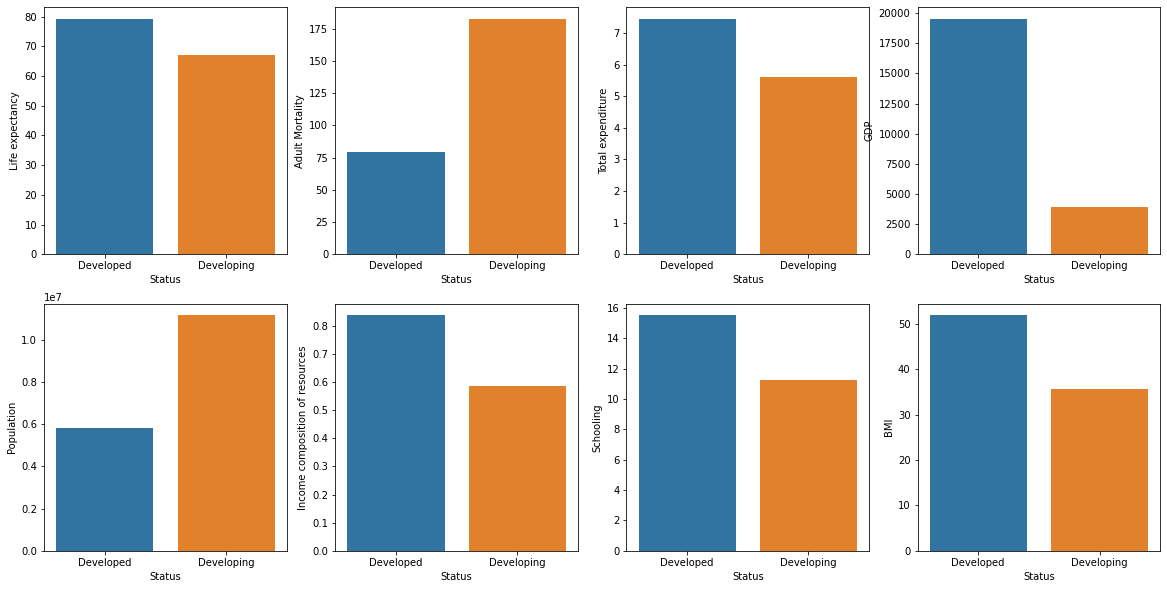

In [84]:
# df.groupby('Status')['Life expectancy'].agg('mean').reset_index()
figure, axes = plt.subplots(2,4,figsize=(20,10))
sn.barplot(x='Status', y='Life expectancy', data=df.groupby('Status')['Life expectancy'].agg('mean').reset_index(), ax=axes[0][0])
sn.barplot(x='Status', y='Adult Mortality', data=df.groupby('Status')['Adult Mortality'].agg('mean').reset_index(), ax=axes[0][1])
sn.barplot(x='Status', y='Total expenditure', data=df.groupby('Status')['Total expenditure'].agg('mean').reset_index(), ax=axes[0][2])
sn.barplot(x='Status', y='GDP', data=df.groupby('Status')['GDP'].agg('mean').reset_index(), ax=axes[0][3])
sn.barplot(x='Status', y='Population', data=df.groupby('Status')['Population'].agg('mean').reset_index(), ax=axes[1][0])
sn.barplot(x='Status', y='Income composition of resources', data=df.groupby('Status')['Income composition of resources'].agg('mean').reset_index(), ax=axes[1][1])
sn.barplot(x='Status', y='Schooling', data=df.groupby('Status')['Schooling'].agg('mean').reset_index(), ax=axes[1][2])
sn.barplot(x='Status', y='BMI', data=df.groupby('Status')['BMI'].agg('mean').reset_index(), ax=axes[1][3])

Take developing country South Africa. Create a subplot of line charts for the variables Life expectancy, GDP, Income composition of resources(ICOR), Population, Total expenditure, Schooling, BMI, under-five deaths, Adult Mortality wrt year.

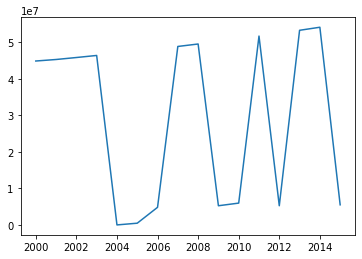

In [42]:
sa_df = df[df['Country']=='South Africa']
# plt.plot(sa_df['Year'], sa_df['Life expectancy'])
# plt.plot(sa_df['Year'], sa_df['GDP'])
# plt.plot(sa_df['Year'], sa_df['Income composition of resources'])
plt.plot(sa_df['Year'], sa_df['Population'])
# plt.plot(sa_df['Year'], sa_df['Total expenditure'])
# plt.plot(sa_df['Year'], sa_df['Schooling'])
# plt.plot(sa_df['Year'], sa_df['BMI'])
# plt.plot(sa_df['Year'], sa_df['under-five deaths'])
# plt.plot(sa_df['Year'], sa_df['Adult Mortality'])


<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

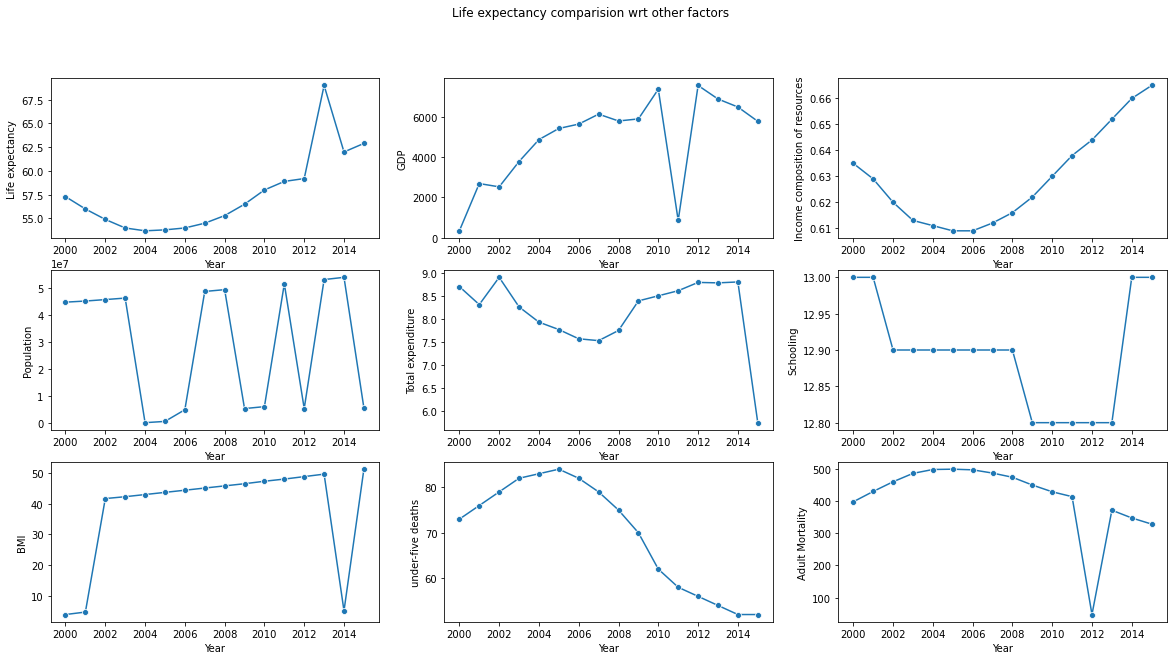

In [43]:
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors')
sn.lineplot(data=sa_df, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=sa_df, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=sa_df, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=sa_df, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=sa_df, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=sa_df, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=sa_df, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=sa_df, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=sa_df, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

In [44]:
df[df['Country']=='Japan'].columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Total expenditure', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'UniqueKey',
       'infant deaths', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Diphtheria', 'HIV/AIDS'],
      dtype='object')

Take developing country South Africa. Create a subplot of line charts for the variables Life expectancy, GDP, Income composition of resources(ICOR), Population, Total expenditure, Schooling, BMI, under-five deaths, Adult Mortality wrt year.

Same as the above question. Do the same for developed country Japan.


In [45]:
df_var = df[df['Country']=='Japan']
# df[['Life expectancy','GDP', 'Income composition of resources', 'Population', 'Total expenditure', 'Schooling', 'BMI', 'under-five deaths', 'Adult Mortality']]

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

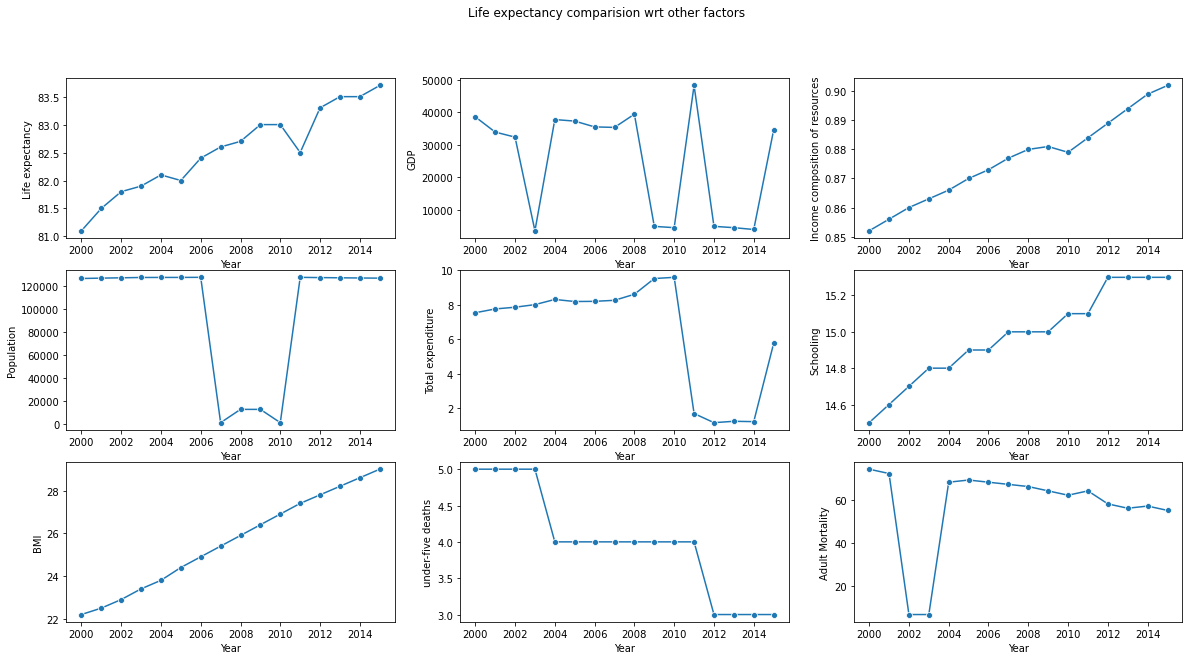

In [46]:
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

### Take India, the United States of America, China, the Central African Republic, Bhutan country. Analyze and share your results.

In [148]:
df_var = df[df['Country']=='India']

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

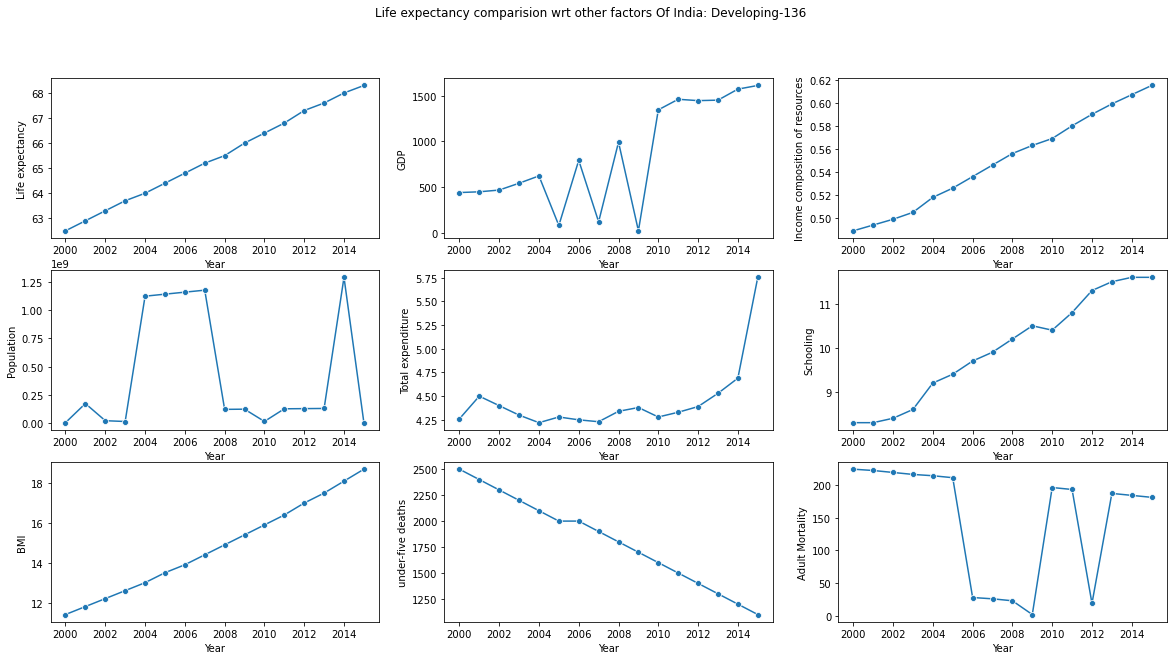

In [149]:
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors Of India: Developing-136')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

In [152]:
df_var = df[df['Country']=='United States of America']

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

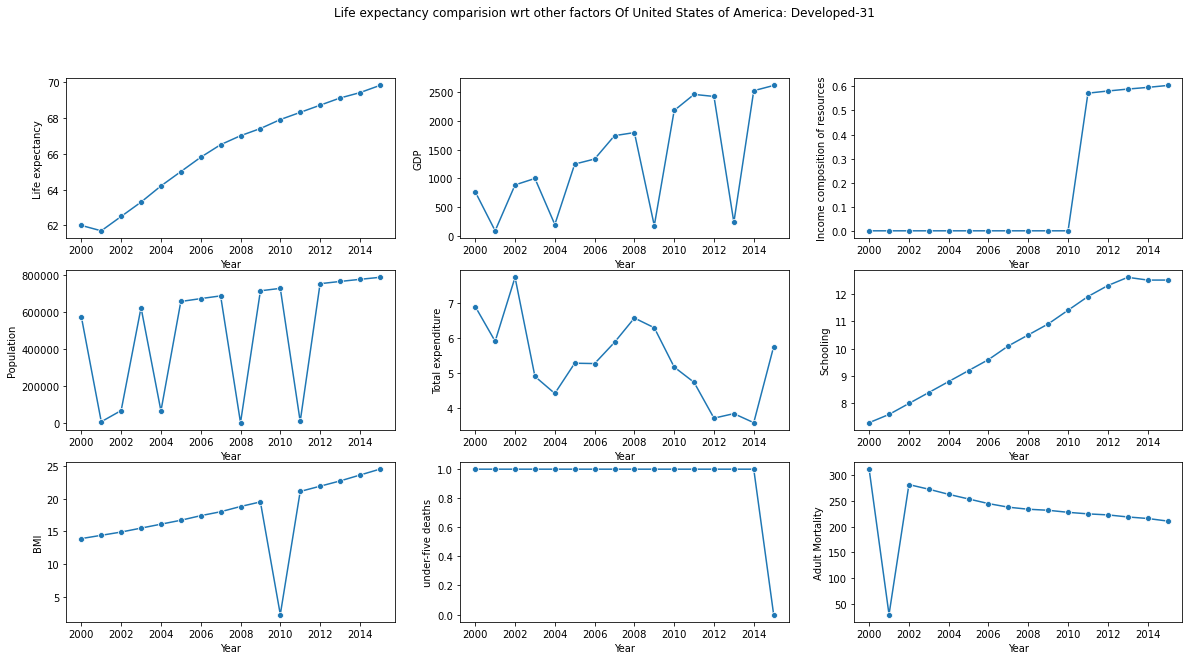

In [99]:
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors Of United States of America: Developed-31 ')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

In [153]:
df_var = df[df['Country']=='China']

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

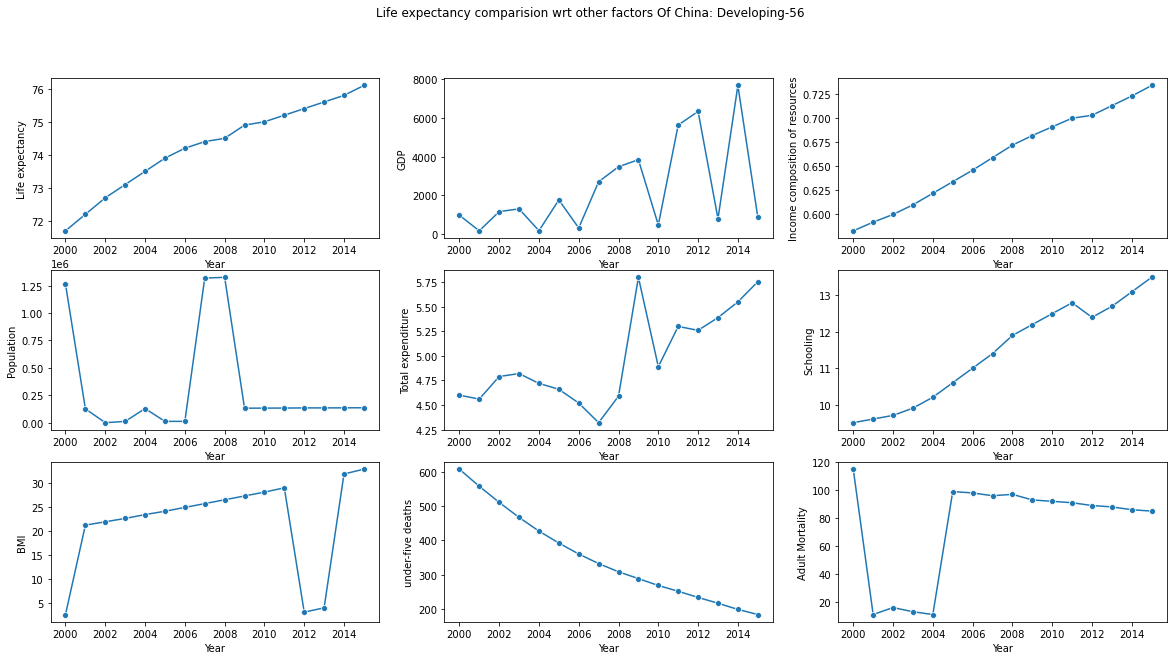

In [154]:
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors Of China: Developing-56')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

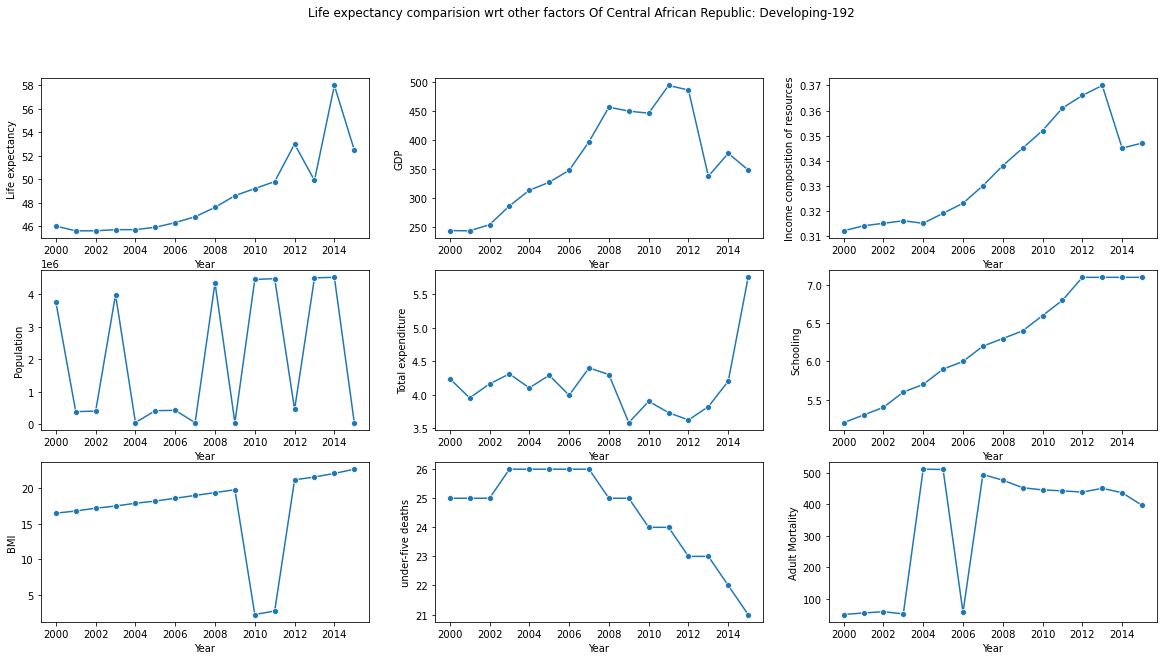

In [103]:
df_var = df[df['Country']=='Central African Republic']
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors Of Central African Republic: Developing-192')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

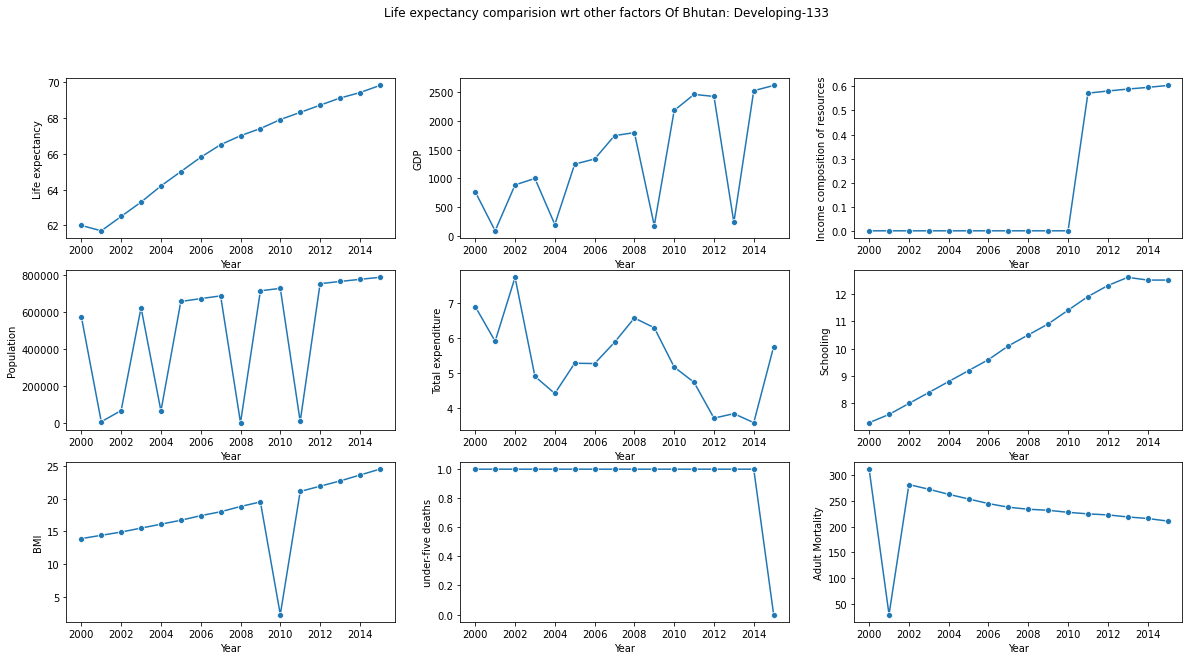

In [155]:
df_var = df[df['Country']=='Bhutan']
fig, axs = plt.subplots(3,3, figsize=(20,10))
fig.suptitle('Life expectancy comparision wrt other factors Of Bhutan: Developing-133')
sn.lineplot(data=df_var, x='Year', y='Life expectancy', marker = 'o', ax=axs[0][0])
sn.lineplot(data=df_var, x='Year', y='GDP', marker = 'o', ax=axs[0][1])
sn.lineplot(data=df_var, x='Year', y='Income composition of resources', marker = 'o', ax=axs[0][2])
sn.lineplot(data=df_var, x='Year', y='Population', marker = 'o', ax=axs[1][0])
sn.lineplot(data=df_var, x='Year', y='Total expenditure', marker = 'o', ax=axs[1][1])
sn.lineplot(data=df_var, x='Year', y='Schooling', marker = 'o', ax=axs[1][2])
sn.lineplot(data=df_var, x='Year', y='BMI', marker = 'o', ax=axs[2][0])
sn.lineplot(data=df_var, x='Year', y='under-five deaths', marker = 'o', ax=axs[2][1])
sn.lineplot(data=df_var, x='Year', y='Adult Mortality', marker = 'o', ax=axs[2][2])

#### 1) Should a country having a lower life expectancy value(<65) increase its healthcare expenditure to improve its average lifespan? ==> NO

<AxesSubplot:xlabel='Life expectancy', ylabel='Total expenditure'>

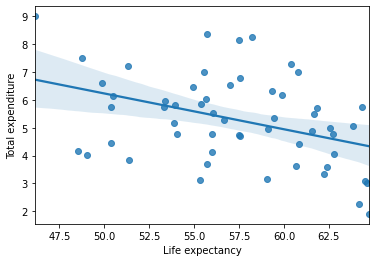

In [121]:
# df[df['Life expectancy']<65][['']]
df_by_country = df.groupby('Country').mean().reset_index()
lower_le = df_by_country[df_by_country['Life expectancy']<65][['Life expectancy','Total expenditure']]
sn.regplot(x='Life expectancy', y='Total expenditure', data=lower_le)

#### Does Life Expectancy have a positive or negative correlation with eating habits(BMI), lifestyle, exercise, smoking, drinking alcohol, etc?

In [125]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Total expenditure', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'UniqueKey',
       'infant deaths', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths',
       'Polio', 'Diphtheria', 'HIV/AIDS'],
      dtype='object')

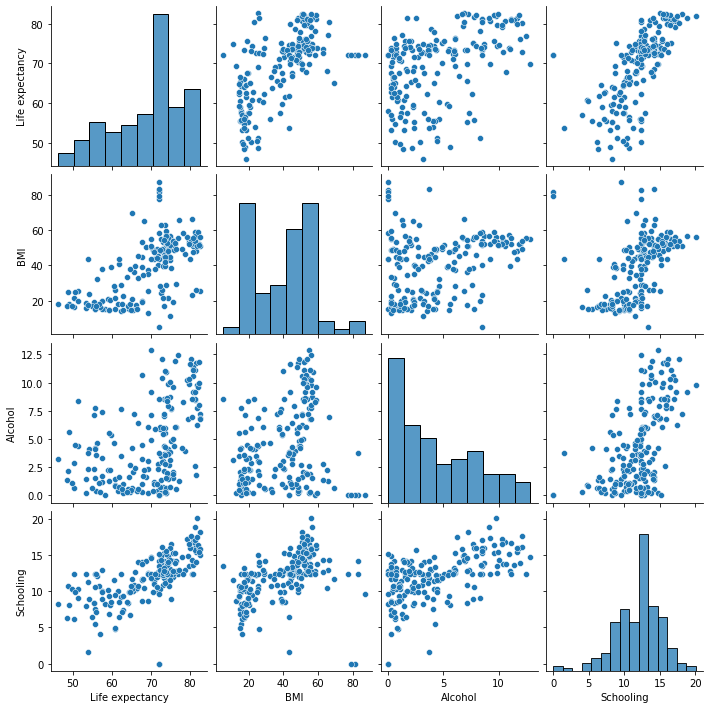

In [135]:
sn.pairplot(df_by_country[['Life expectancy', 'BMI', 'Alcohol', 'Schooling']])

<AxesSubplot:>

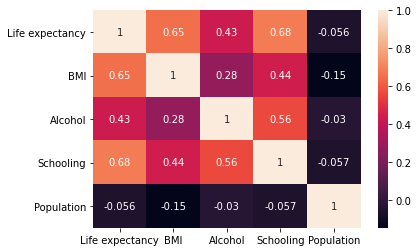

In [138]:
sn.heatmap(df_by_country[['Life expectancy', 'BMI', 'Alcohol', 'Schooling', 'Population']].corr(), annot=True)

In [146]:
df_by_country.loc[(df_by_country['BMI']<18.5) & (df_by_country['Life expectancy']>65)][['Life expectancy', 'BMI']]

,Life expectancy,BMI
12,69.30000,12.87500
18,66.16250,17.58125
76,65.41875,14.79375
118,66.48125,15.17500
142,72.10000,5.20000
161,73.40000,17.27500
189,74.77500,11.18750


In [147]:
df_by_country.loc[(df_by_country['BMI']>30) & (df_by_country['Life expectancy']<65)][['Life expectancy', 'BMI']]

,Life expectancy,BMI
21,56.05000,32.24375
72,59.86875,39.27500
130,61.68125,40.78750
158,57.50000,38.15000
159,53.87500,43.50000
162,61.82500,43.50000
177,64.61875,38.11875
190,63.86250,33.48750
